In [1]:
import json
import pandas as pd

In [2]:
with open('../data/DorianGray/coref_merge_map.json') as f:
    coref_map = json.load(f)

quotes_df = pd.read_csv('../data/DorianGray/character-tagging/DorianGray.quotes', delimiter='\t')
entities_df = pd.read_csv('../data/DorianGray/processed_characters.csv')

In [3]:
quotes_df

,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,389,406,408,409,Lord Henry,112,"It is your best work , Basil , the best thing..."
1,412,488,408,409,Lord Henry,112,You must certainly send it next year to the G...
2,489,500,501,501,he,366,"I do n't think I shall send it anywhere ,"
3,524,534,505,505,his,366,"No , I wo n't send it anywhere ."
4,569,683,538,538,his,112,"Not send it anywhere ? My dear fellow , why ?..."
...,...,...,...,...,...,...,...
1532,94257,94262,94278,94281,a most just God,1812,Forgive us our sins
1533,94264,94270,94278,94281,a most just God,1812,Smite us for our iniquities
1534,94383,94405,94362,94368,some one who had terribly loved him,1813,The world is changed because you are made of ...
1535,95796,95804,95806,95811,the elder of the two gentlemen,1838,"Whose house is that , Constable ?"


In [4]:
from typing import List, Set
from dataclasses import dataclass


@dataclass
class Quote:
    text: str
    speaker_id: int


@dataclass
class Dialogue:
    start_token: int
    end_token: int
    quotes: List[Quote]
    involved_characters: Set[int]


dialogue_join_threshold_tokens = 150


dialogues = []

for i, row in quotes_df.iterrows():

    if i == 0 or row.quote_start - dialogues[-1].end_token > dialogue_join_threshold_tokens:
        dialogues.append(Dialogue(start_token=row.quote_start, end_token=row.quote_end, quotes=list(), involved_characters=set()))
    
    dialogues[-1].end_token = row.quote_end
    dialogues[-1].quotes.append(Quote(text=row.quote, speaker_id=row.char_id))
    dialogues[-1].involved_characters.add(row.char_id)

len(dialogues) and dialogues[1]

Dialogue(start_token=5567, end_token=7858, quotes=[Quote(text=' My dear fellow , I have just remembered . ', speaker_id=112), Quote(text=' Remembered what , Harry ? ', speaker_id=112), Quote(text=' Where I heard the name of Dorian Gray . ', speaker_id=112), Quote(text=' Where was it ? ', speaker_id=113), Quote(text=" Do n't look so angry , Basil . It was at my aunt , Lady Agatha 's . She told me she had discovered a wonderful young man who was going to help her in the East End , and that his name was Dorian Gray . I am bound to state that she never told me he was good - looking . Women have no appreciation of good looks ; at least , good women have not . She said that he was very earnest and had a beautiful nature . I at once pictured to myself a creature with spectacles and lank hair , horribly freckled , and tramping about on huge feet . I wish I had known it was your friend . ", speaker_id=112), Quote(text=" I am very glad you did n't , Harry . ", speaker_id=1982), Quote(text=' Why 

In [5]:
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,orig_coref,character_name
0,4,112,77,79,PROP,PER,Lord Henry Wotton,112.0,Lord Henry Wotton
1,6,112,156,156,PRON,PER,him,112.0,Lord Henry Wotton
2,14,113,289,290,PROP,PER,Basil Hallward,112.0,Basil Hallward
3,27,113,396,396,PROP,PER,Basil,113.0,Basil Hallward
4,29,112,408,409,PROP,PER,Lord Henry,113.0,Lord Henry Wotton
...,...,...,...,...,...,...,...,...,...
7166,14196,307,95668,95668,PRON,PER,he,NaN,Alan Campbell
7167,14197,307,95674,95674,PRON,PER,He,NaN,Alan Campbell
7168,14215,115,95814,95816,PROP,PER,Mr. Dorian Gray,NaN,Mr. Dorian Gray
7169,14232,268,95885,95885,PROP,PER,Francis,NaN,Francis Osborne


In [6]:
char_id_lookup = {row.COREF: row.character_name for i, row in entities_df.iterrows()}
char_id_lookup.update({key: char_id_lookup[val] for key, val in coref_map.items() if val in char_id_lookup})
char_id_lookup_reverse = {val: key for key, val in char_id_lookup.items()}
char_id_lookup

{112: 'Lord Henry Wotton',
 113: 'Basil Hallward',
 115: 'Mr. Dorian Gray',
 116: 'Poor Lady Brandon',
 126: 'Lady Agatha',
 131: 'Good God',
 134: 'Lord Fermor',
 137: 'Uncle George',
 138: 'the last Lord Kelso',
 139: 'Lady Margaret Devereux',
 144: 'the Americans',
 149: 'Sir Thomas Burdon',
 150: 'Mr. Erskine of Treadley',
 153: 'Duchess',
 162: 'Lady Henry',
 166: 'Miss Sibyl Vane',
 169: 'Juliet',
 180: 'Mother',
 181: 'Mrs. Vane',
 182: 'Mr. Isaacs',
 183: 'James Vane',
 184: 'Prince Charming',
 197: 'Victor',
 215: 'Adrian Singleton',
 219: 'Mr. Hubbard',
 265: 'Louis XIV',
 268: 'Francis Osborne',
 273: 'George Willoughby',
 307: 'Alan Campbell',
 316: 'Dear Lady Narborough',
 318: 'Lady Ruxton',
 330: 'Sir Geoffrey Clouston',
 335: 'Gladys',
 347: 'Hetty Merton'}

In [7]:
character_of_interest = 'Mr. Dorian Gray'

del_idxs = []
filtered_dialogues = [dialogue for dialogue in dialogues if char_id_lookup_reverse[character_of_interest] in dialogue.involved_characters]
len(filtered_dialogues)

36

In [8]:
other_characters = set()
for dialogue in filtered_dialogues:
    other_characters = other_characters.union(dialogue.involved_characters)

other_characters.remove(char_id_lookup_reverse[character_of_interest])
other_characters

{112,
 113,
 150,
 162,
 183,
 197,
 212,
 215,
 219,
 307,
 316,
 318,
 330,
 365,
 366,
 374,
 396,
 405,
 457,
 484,
 489,
 547,
 569,
 577,
 747,
 821,
 824,
 939,
 942,
 973,
 991,
 997,
 1019,
 1360,
 1365,
 1479,
 1497,
 1535,
 1539,
 1542,
 1549,
 1574,
 1617,
 1630,
 1635,
 1665,
 1685,
 1688,
 1689,
 1698,
 1699,
 1700,
 1743,
 1756,
 1775,
 1799,
 1982,
 2162}

In [9]:
filtered_other_characters = [char_id_lookup[char] for char in other_characters if char in char_id_lookup]
filtered_other_characters

['Mr. Erskine of Treadley',
 'Lady Henry',
 'Alan Campbell',
 'James Vane',
 'Dear Lady Narborough',
 'Lady Ruxton',
 'Victor',
 'Sir Geoffrey Clouston',
 'Adrian Singleton',
 'Mr. Hubbard',
 'Lord Henry Wotton',
 'Basil Hallward']

In [10]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

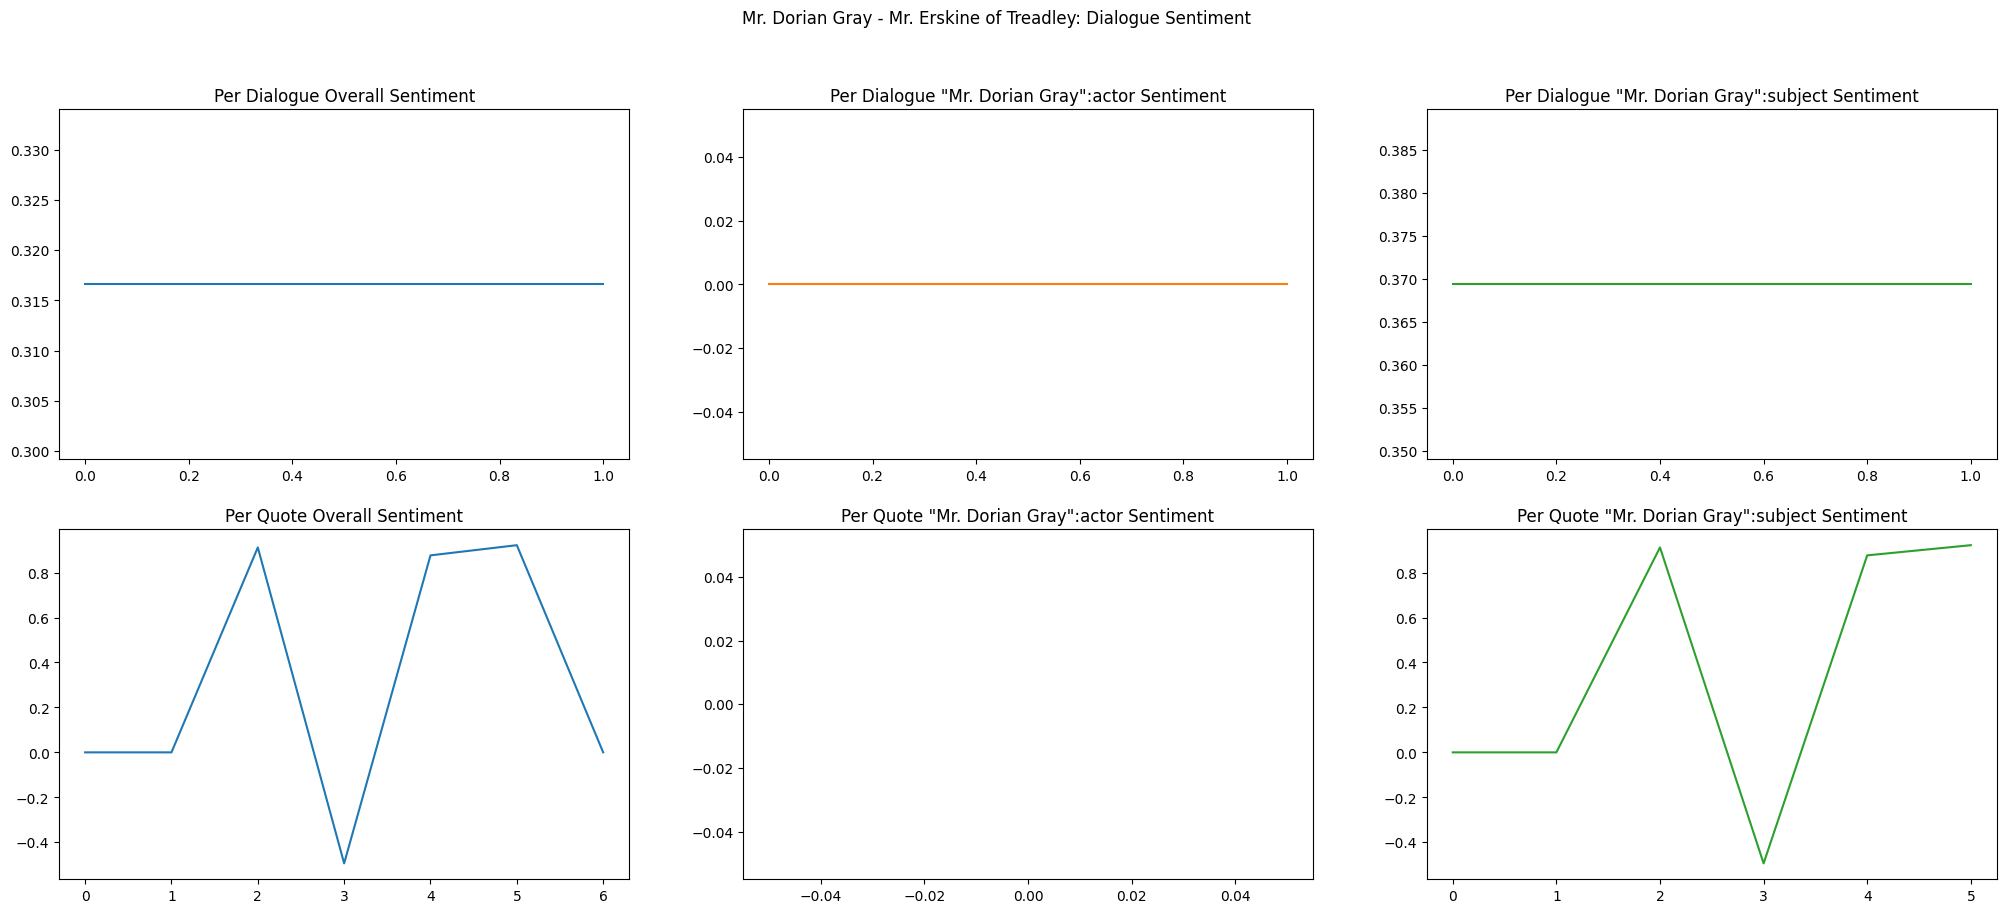

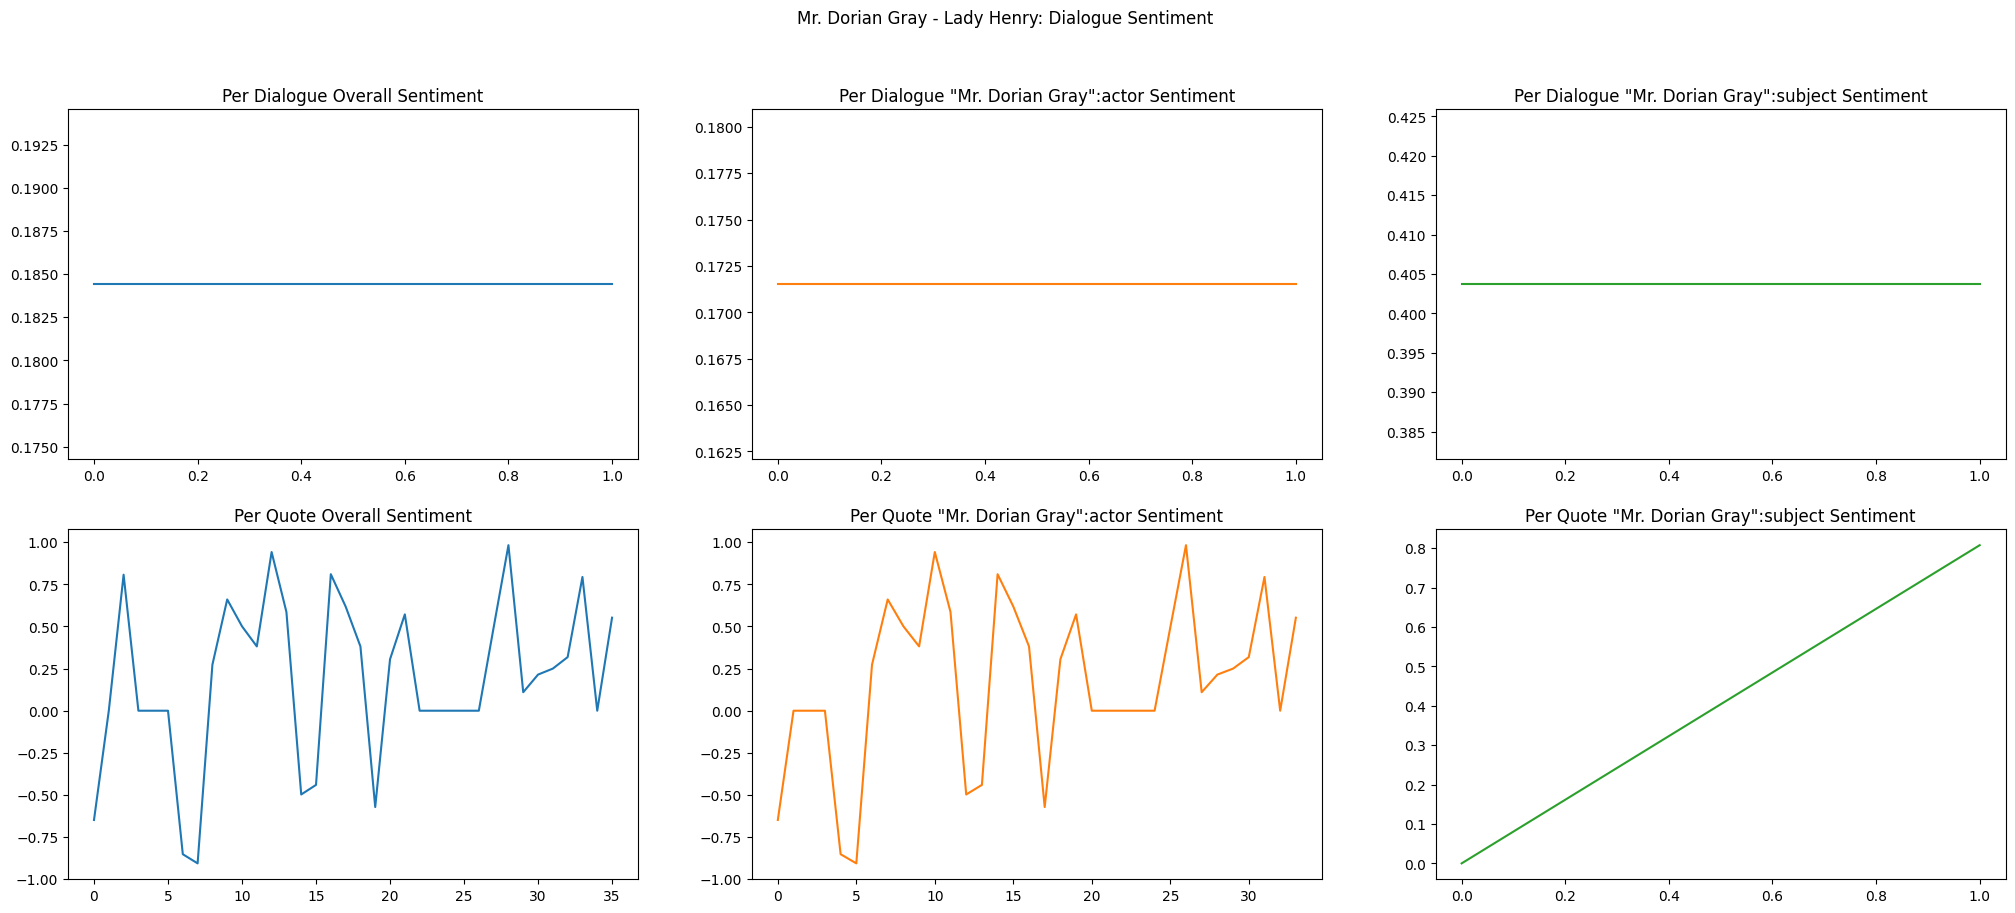

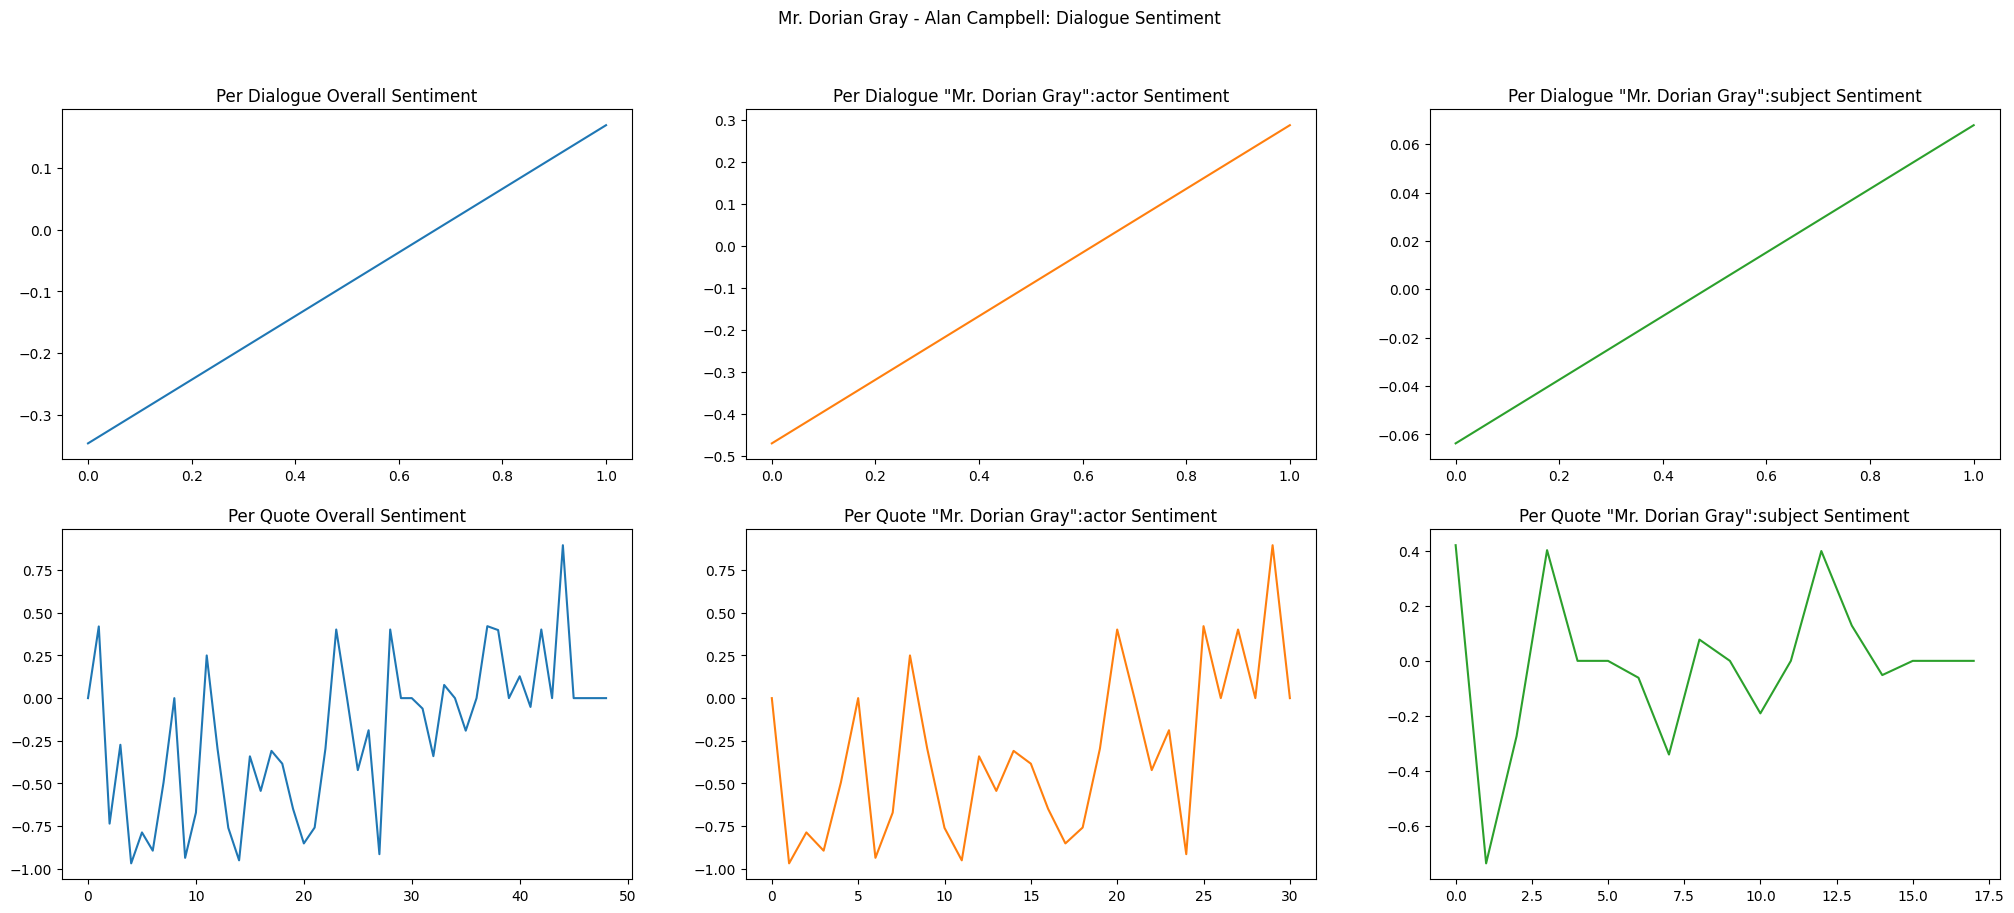

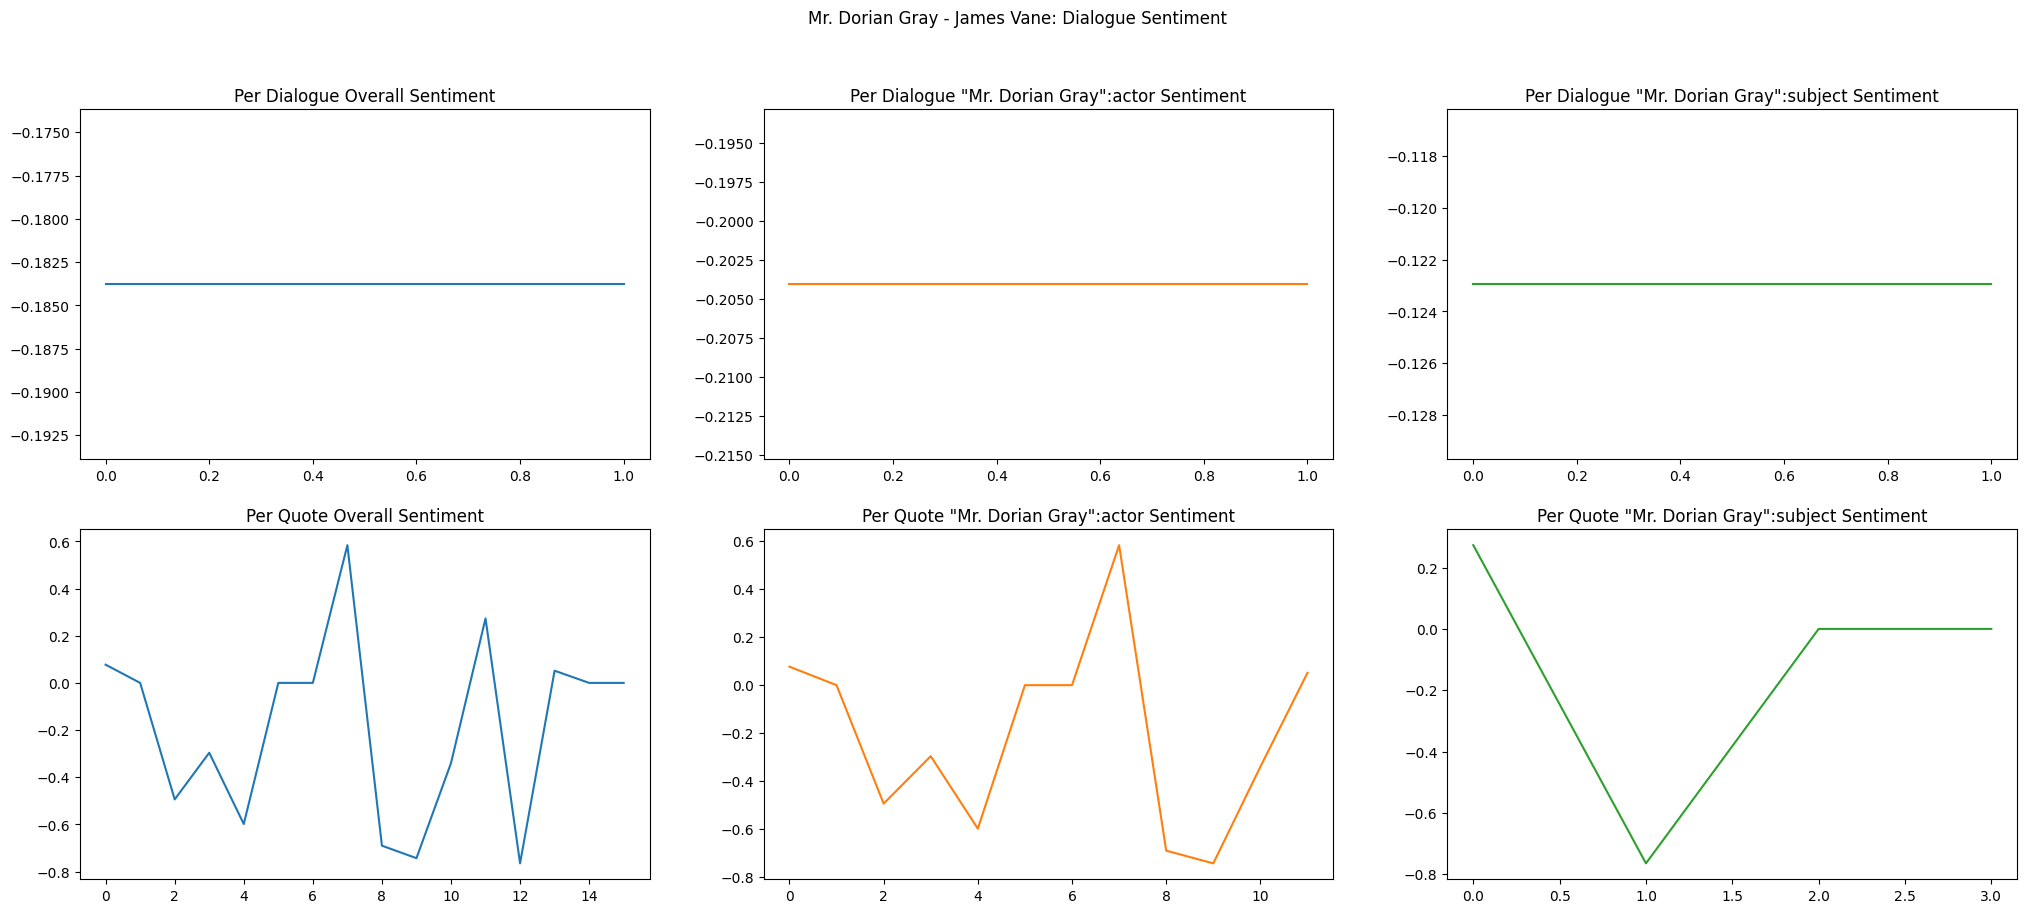

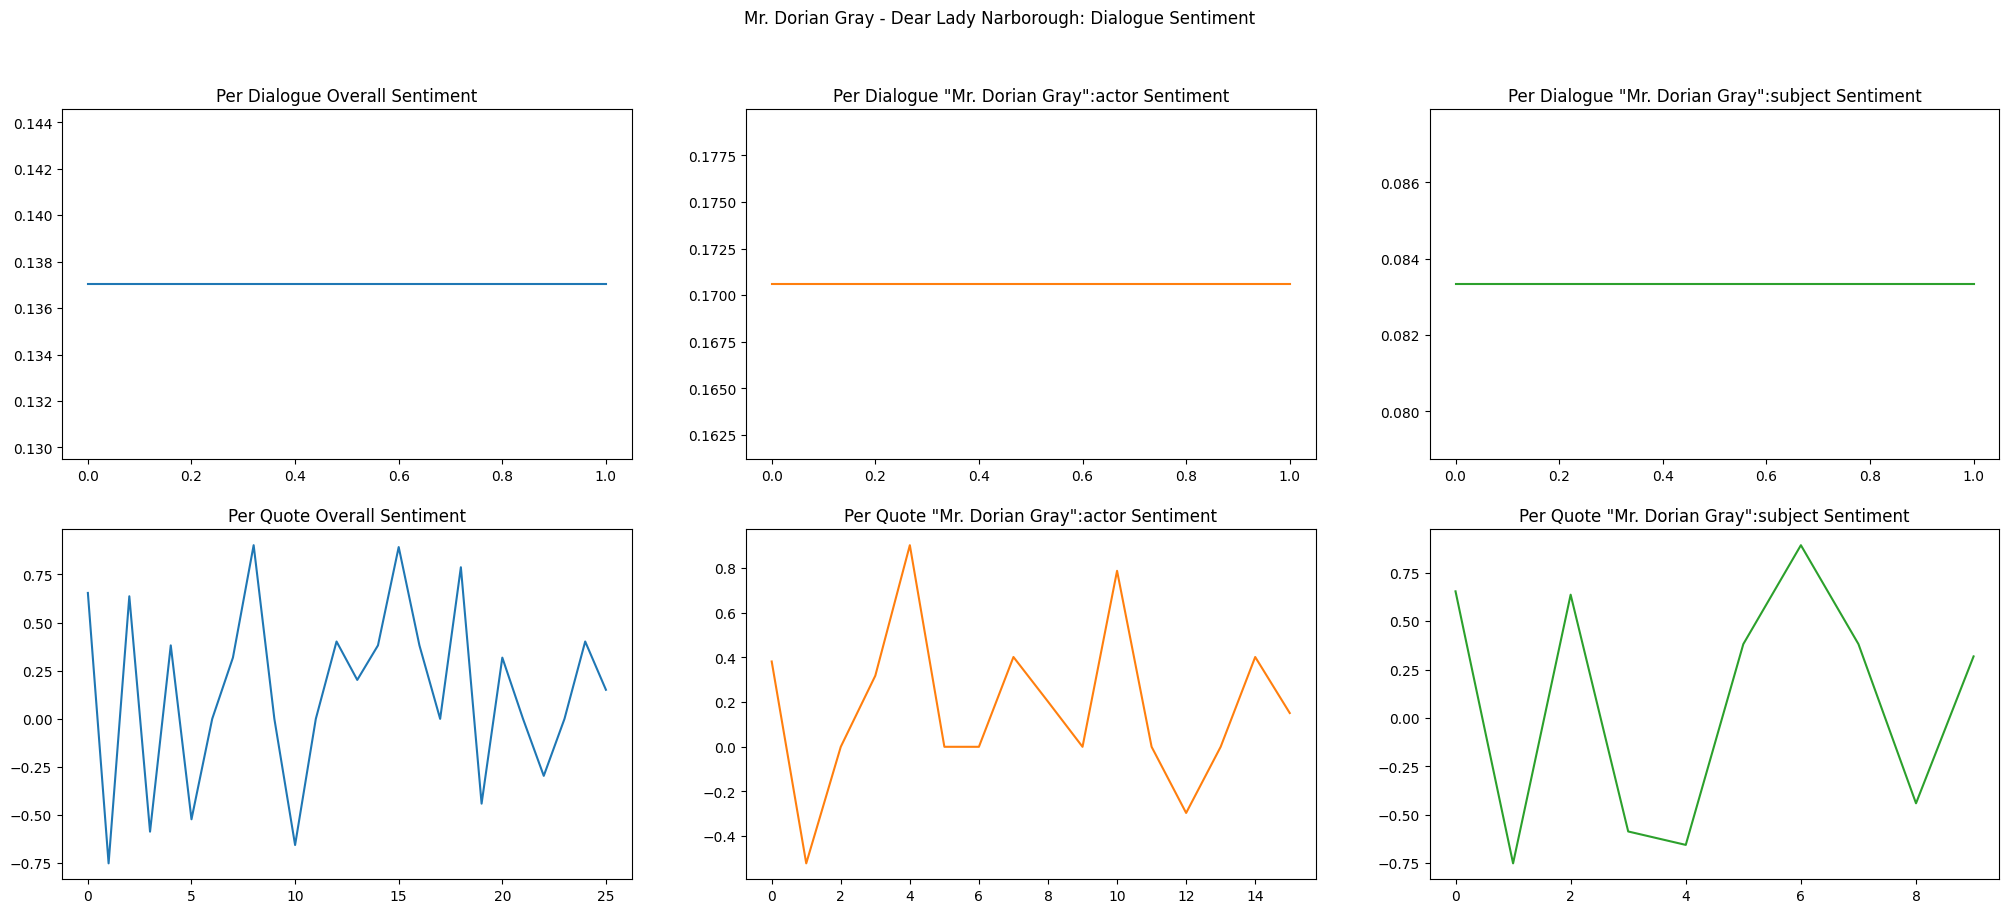

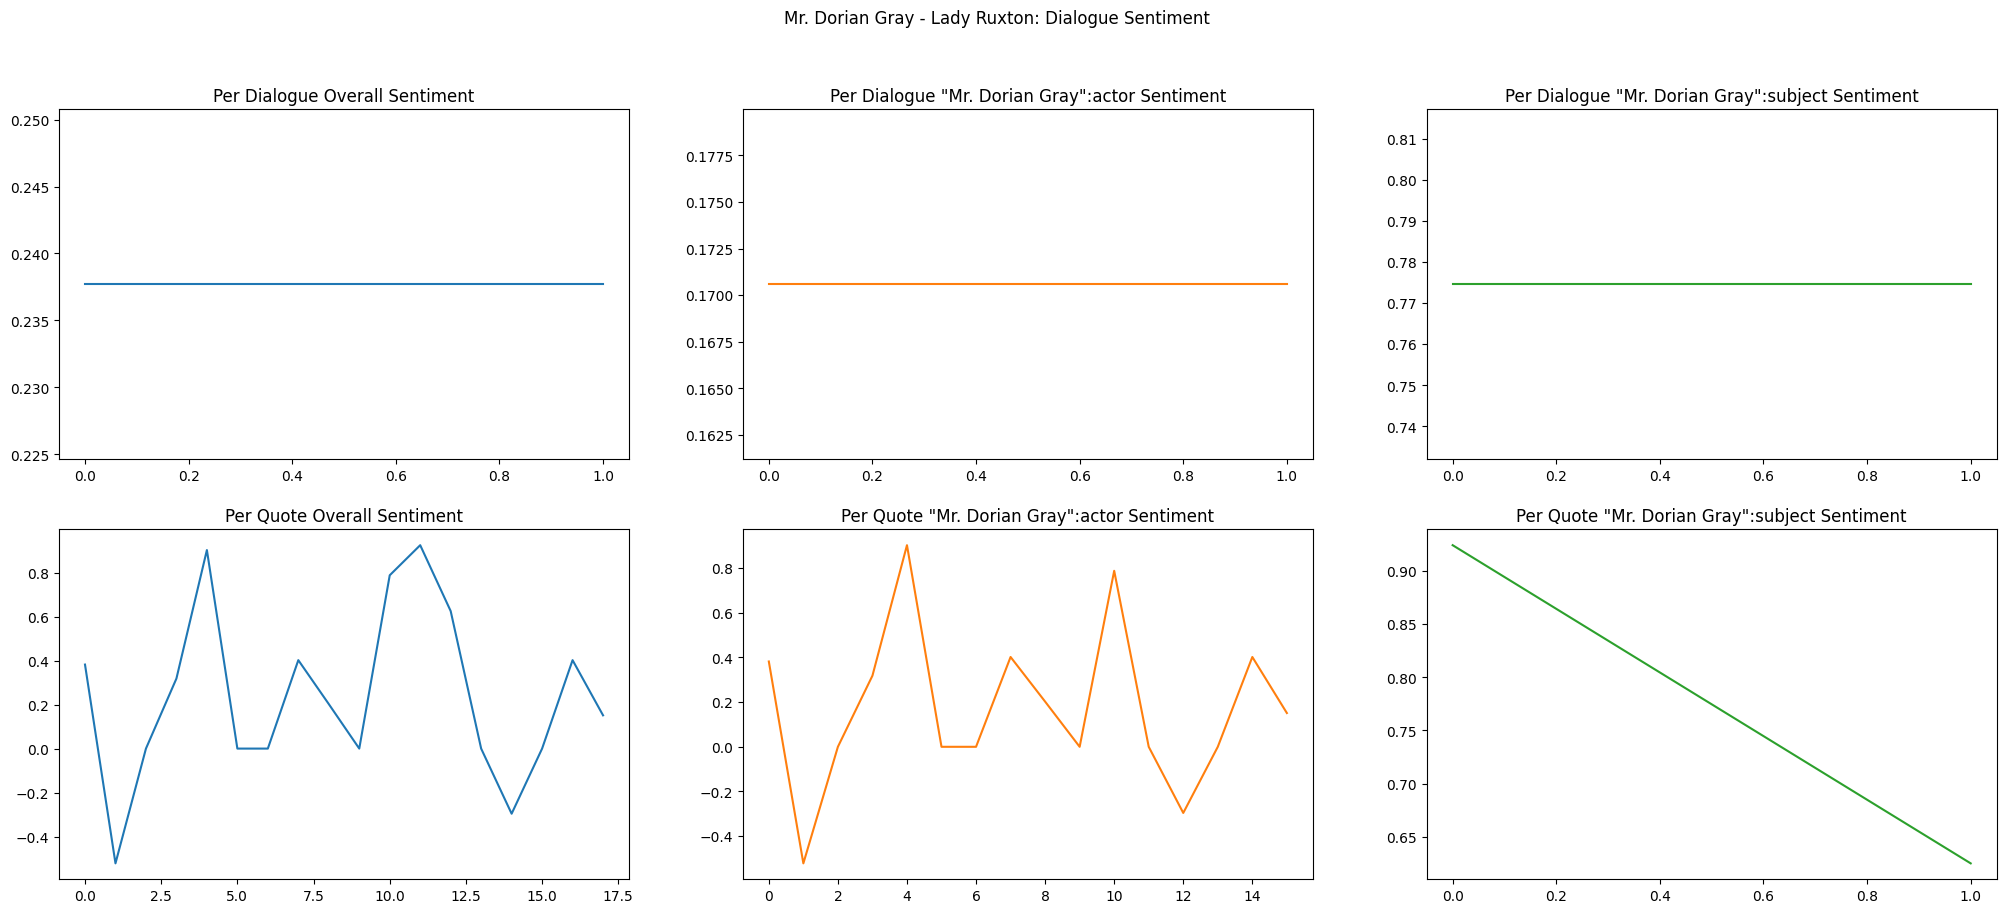

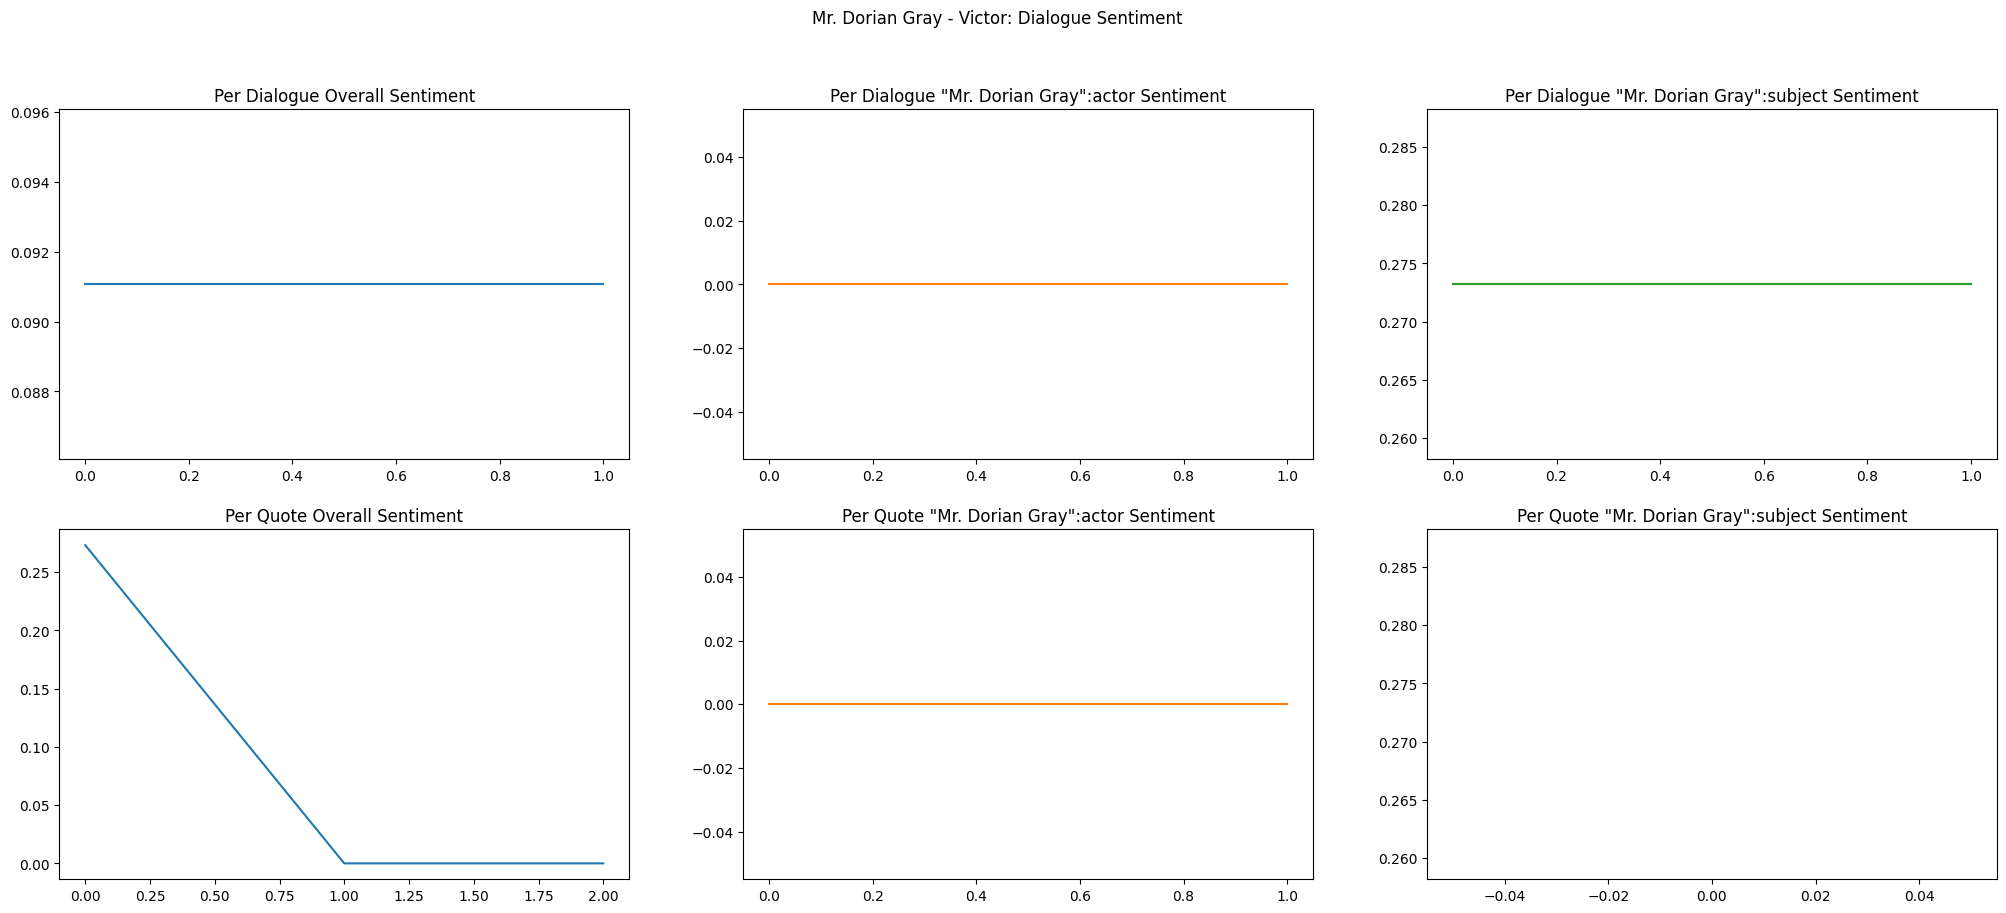

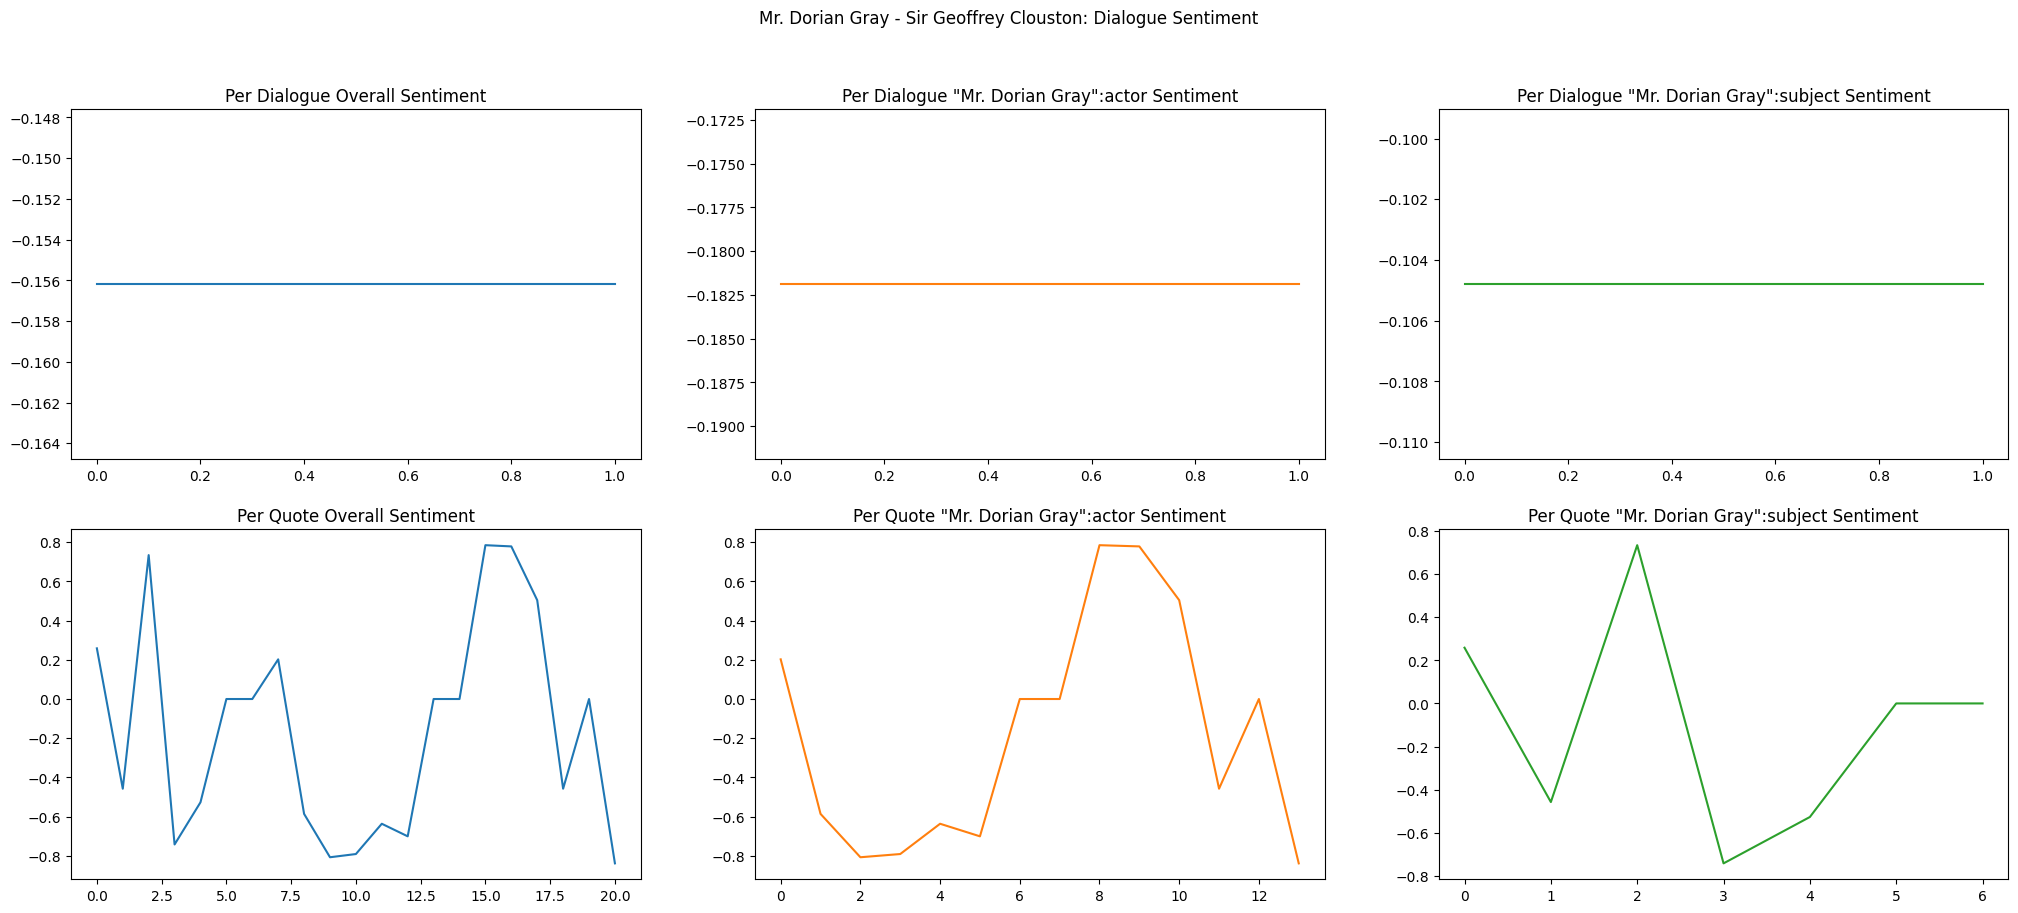

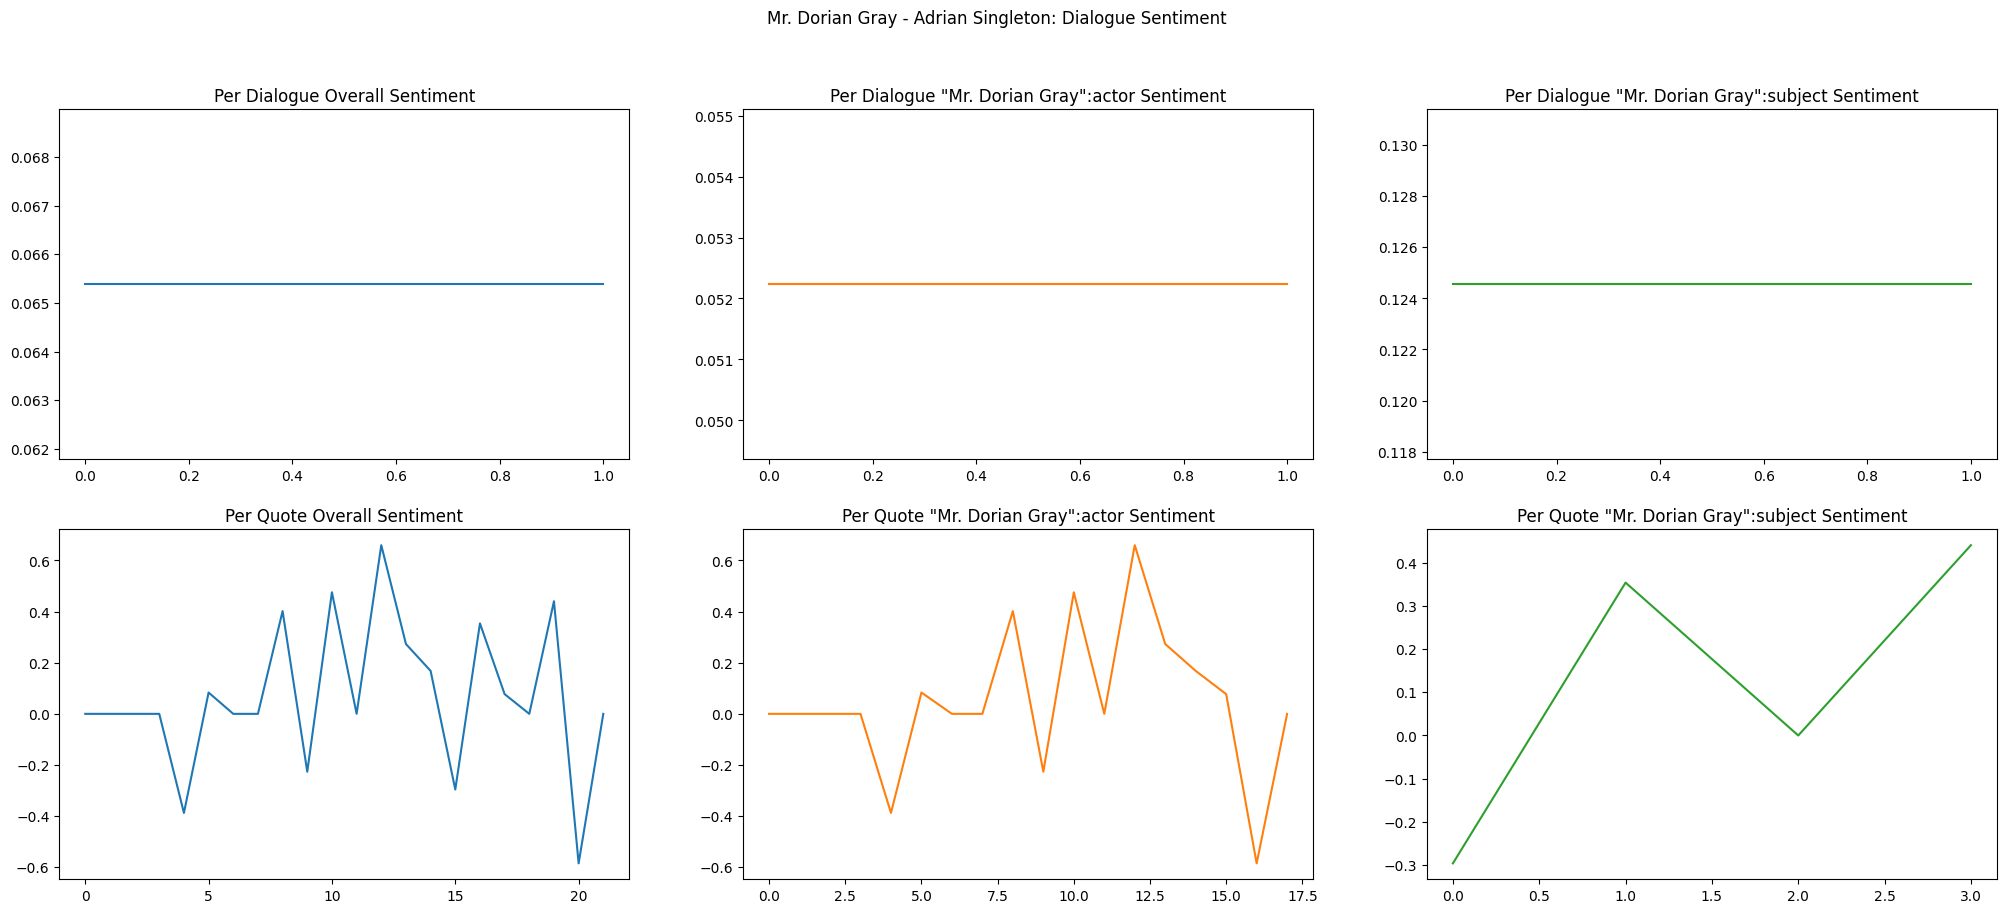

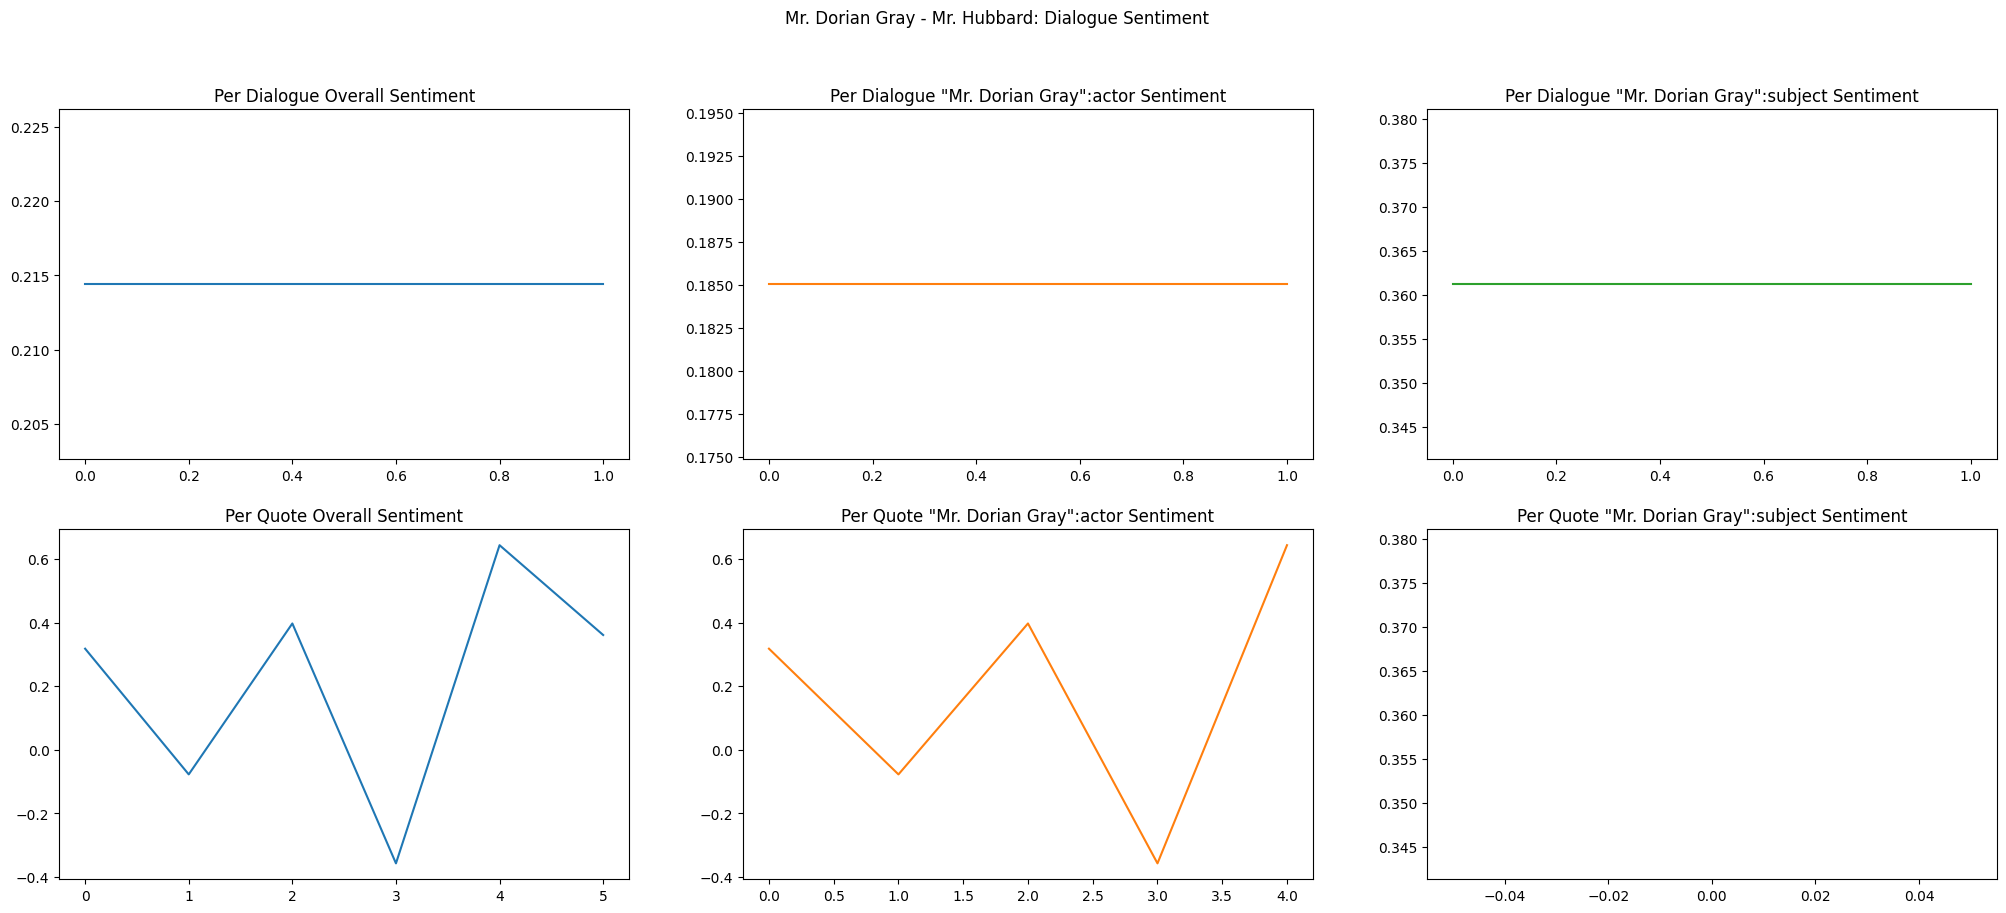

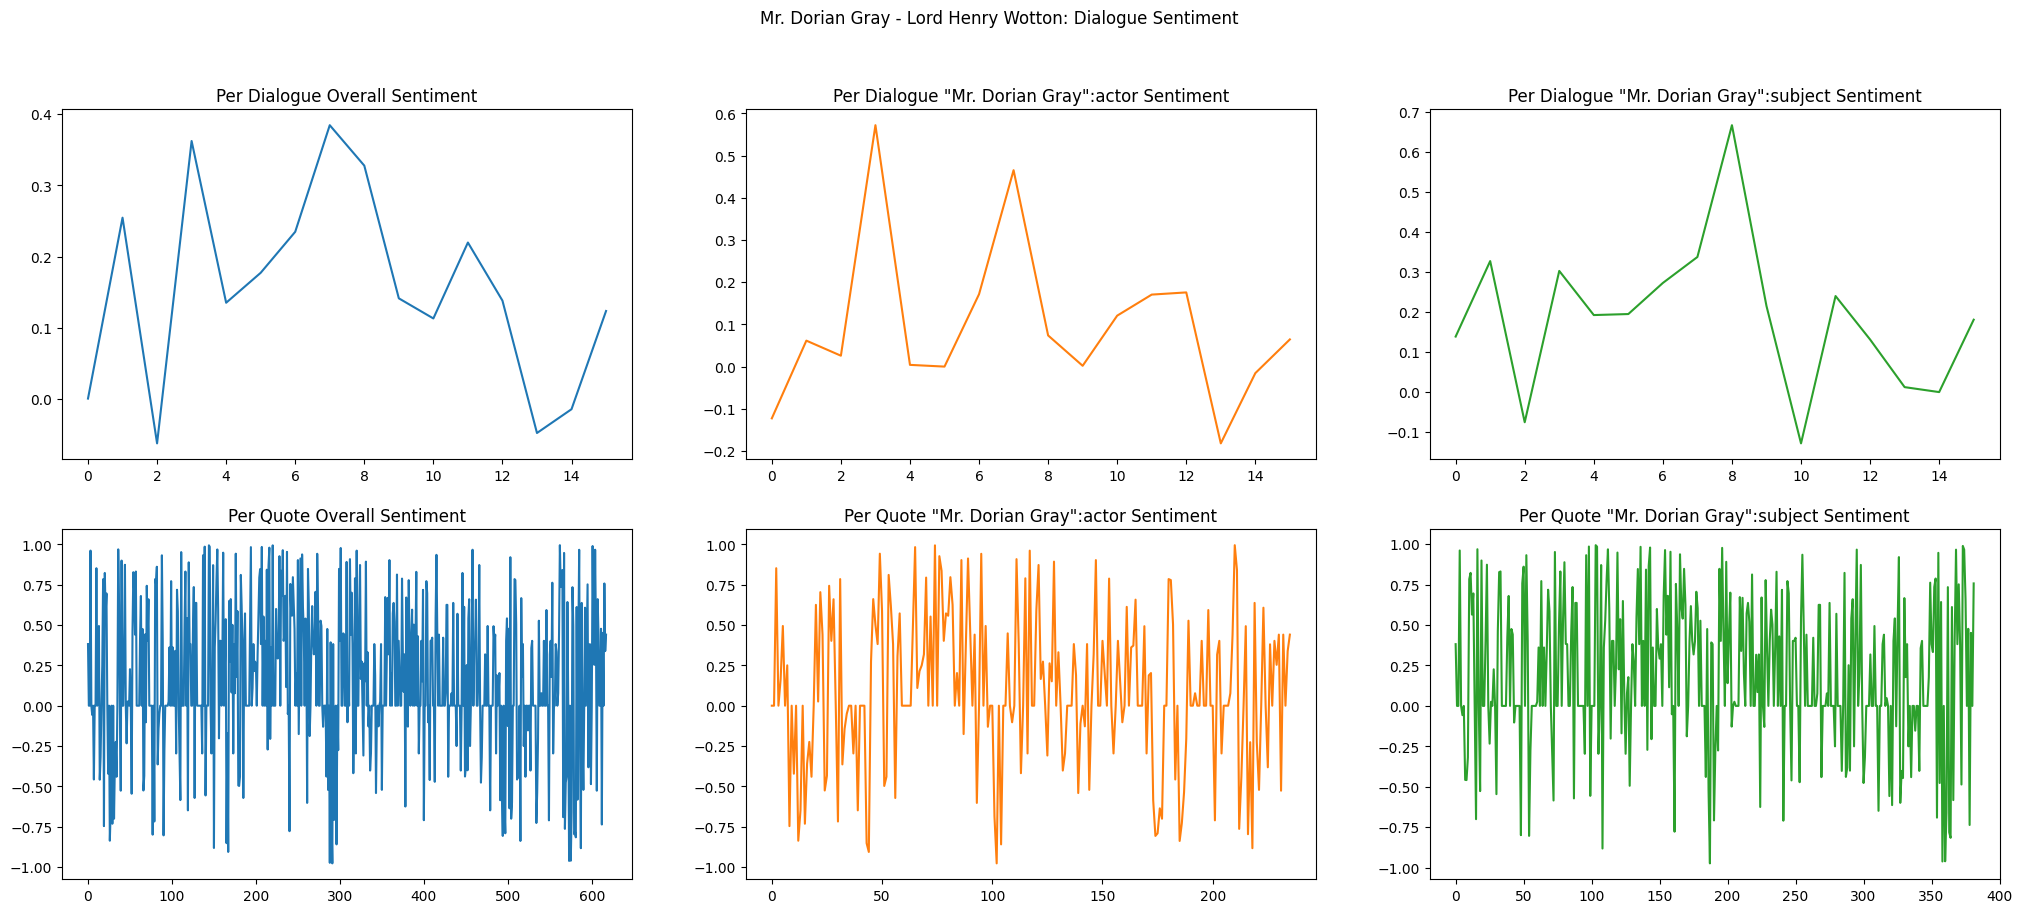

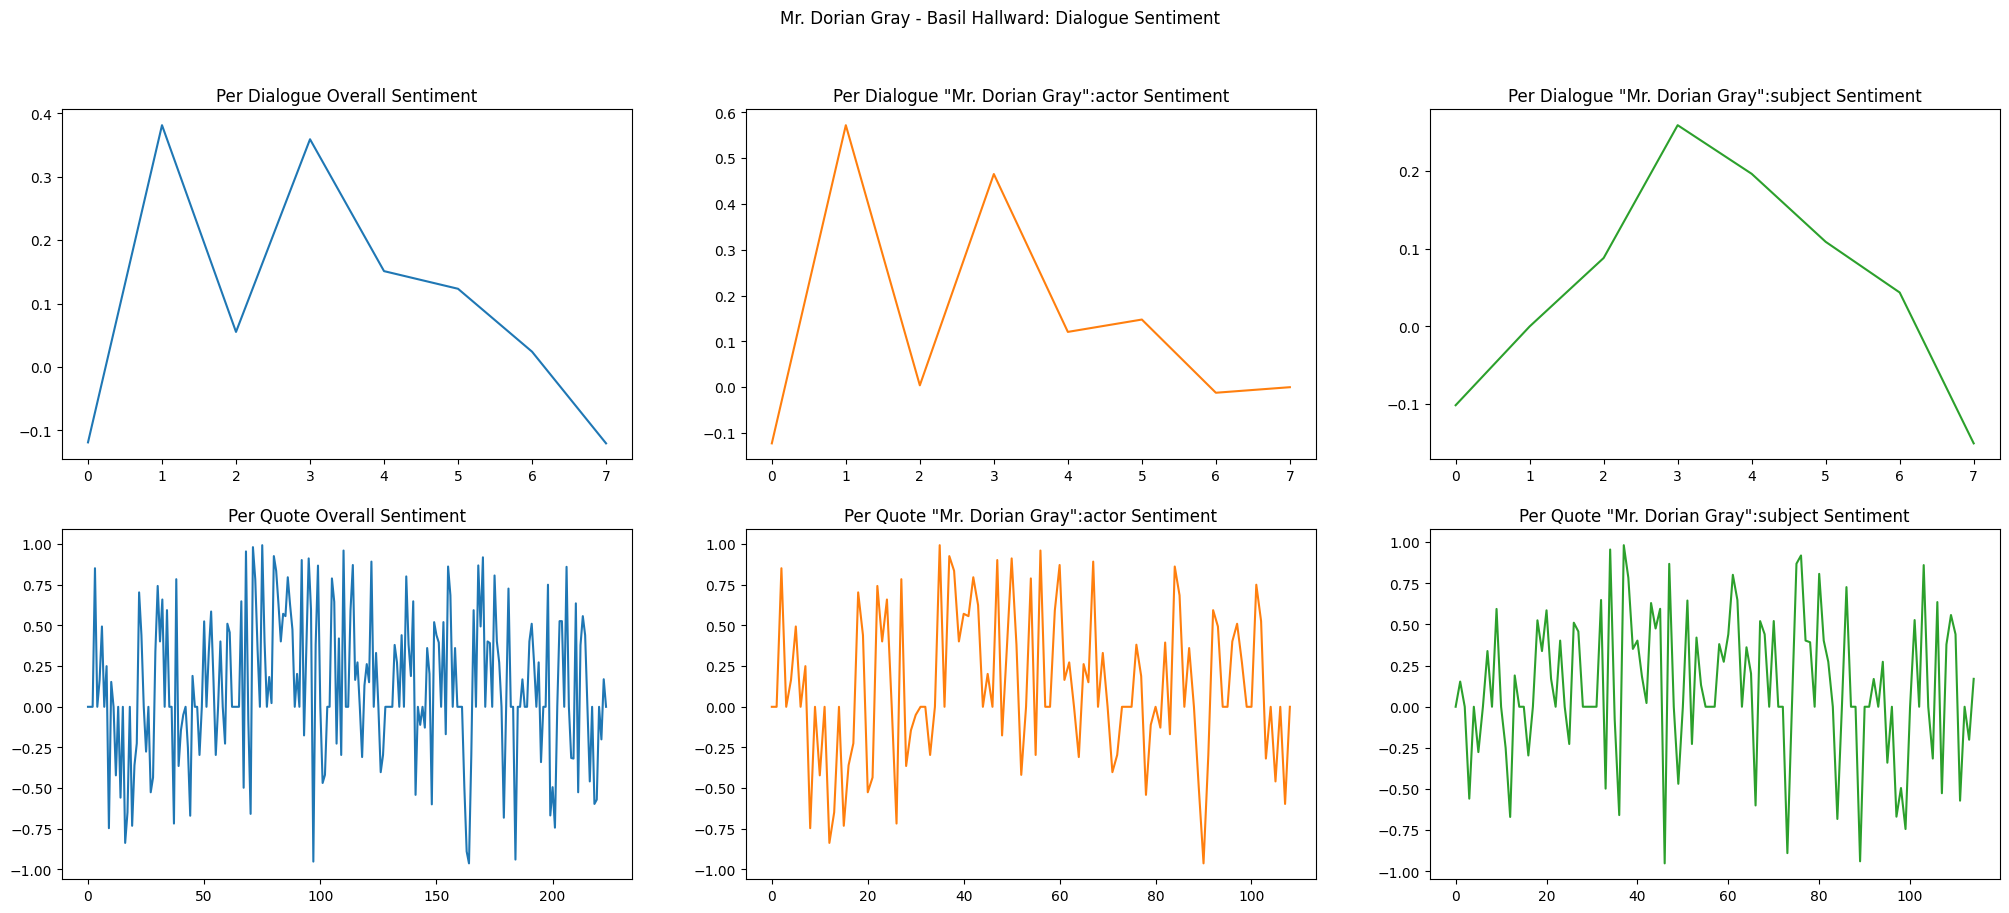

In [11]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


char_of_interest_id = char_id_lookup_reverse[character_of_interest]

sentiment_predictor = SentimentIntensityAnalyzer()

for character in filtered_other_characters:
    char_id = char_id_lookup_reverse[character]
    per_dialogue_overall_sentiment = []
    per_dialogue_coi_actor_sentiment = []
    per_dialogue_coi_subject_sentiment = []

    per_quote_overall_sentiment = []
    per_quote_coi_actor_sentiment = []
    per_quote_coi_subject_sentiment = []
    
    for dialogue in filtered_dialogues:
        if char_id not in dialogue.involved_characters:
            continue

        sent_overall = []
        sent_coi_actor = []
        sent_coi_subject = []

        for quote in dialogue.quotes:
            if not quote.speaker_id == char_id and not quote.speaker_id == char_of_interest_id:
                continue

            polarity = sentiment_predictor.polarity_scores(quote.text)['compound']
            sent_overall.append(polarity)
            if quote.speaker_id == char_id:
                sent_coi_subject.append(polarity)
            else:
                sent_coi_actor.append(polarity)

        per_dialogue_overall_sentiment.append(sum(sent_overall) / len(sent_overall))
        per_dialogue_coi_actor_sentiment.append(sum(sent_coi_actor) / len(sent_coi_actor))
        per_dialogue_coi_subject_sentiment.append(sum(sent_coi_subject) / len(sent_coi_subject))

        per_quote_overall_sentiment.extend(sent_overall)
        per_quote_coi_actor_sentiment.extend(sent_coi_actor)
        per_quote_coi_subject_sentiment.extend(sent_coi_subject)

    if len(per_dialogue_overall_sentiment) == 1:
        per_dialogue_overall_sentiment = 2 * per_dialogue_overall_sentiment
        per_dialogue_coi_actor_sentiment = 2 * per_dialogue_coi_actor_sentiment
        per_dialogue_coi_subject_sentiment = 2 * per_dialogue_coi_subject_sentiment
    
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f'{character_of_interest} - {character}: Dialogue Sentiment')

    axis = np.arange(len(per_dialogue_overall_sentiment))
    axs[0, 0].plot(axis, per_dialogue_overall_sentiment)
    axs[0, 0].set_title('Per Dialogue Overall Sentiment')

    axis = np.arange(len(per_dialogue_coi_actor_sentiment))
    axs[0, 1].plot(axis, per_dialogue_coi_actor_sentiment, 'tab:orange')
    axs[0, 1].set_title(f'Per Dialogue "{character_of_interest}":actor Sentiment')

    axis = np.arange(len(per_dialogue_coi_subject_sentiment))
    axs[0, 2].plot(axis, per_dialogue_coi_subject_sentiment, 'tab:green')
    axs[0, 2].set_title(f'Per Dialogue "{character_of_interest}":subject Sentiment')

    axis = np.arange(len(per_quote_overall_sentiment))
    axs[1, 0].plot(axis, per_quote_overall_sentiment)
    axs[1, 0].set_title('Per Quote Overall Sentiment')

    axis = np.arange(len(per_quote_coi_actor_sentiment))
    axs[1, 1].plot(axis, per_quote_coi_actor_sentiment, 'tab:orange')
    axs[1, 1].set_title(f'Per Quote "{character_of_interest}":actor Sentiment')

    axis = np.arange(len(per_quote_coi_subject_sentiment))
    axs[1, 2].plot(axis, per_quote_coi_subject_sentiment, 'tab:green')
    axs[1, 2].set_title(f'Per Quote "{character_of_interest}":subject Sentiment')
    
    plt.show()

In [12]:
per_dialogue_overall_sentiment

[-0.11874545454545454,
 0.3813,
 0.055391666666666665,
 0.3591257142857143,
 0.15123076923076922,
 0.12339583333333337,
 0.024252173913043473,
 -0.1203]

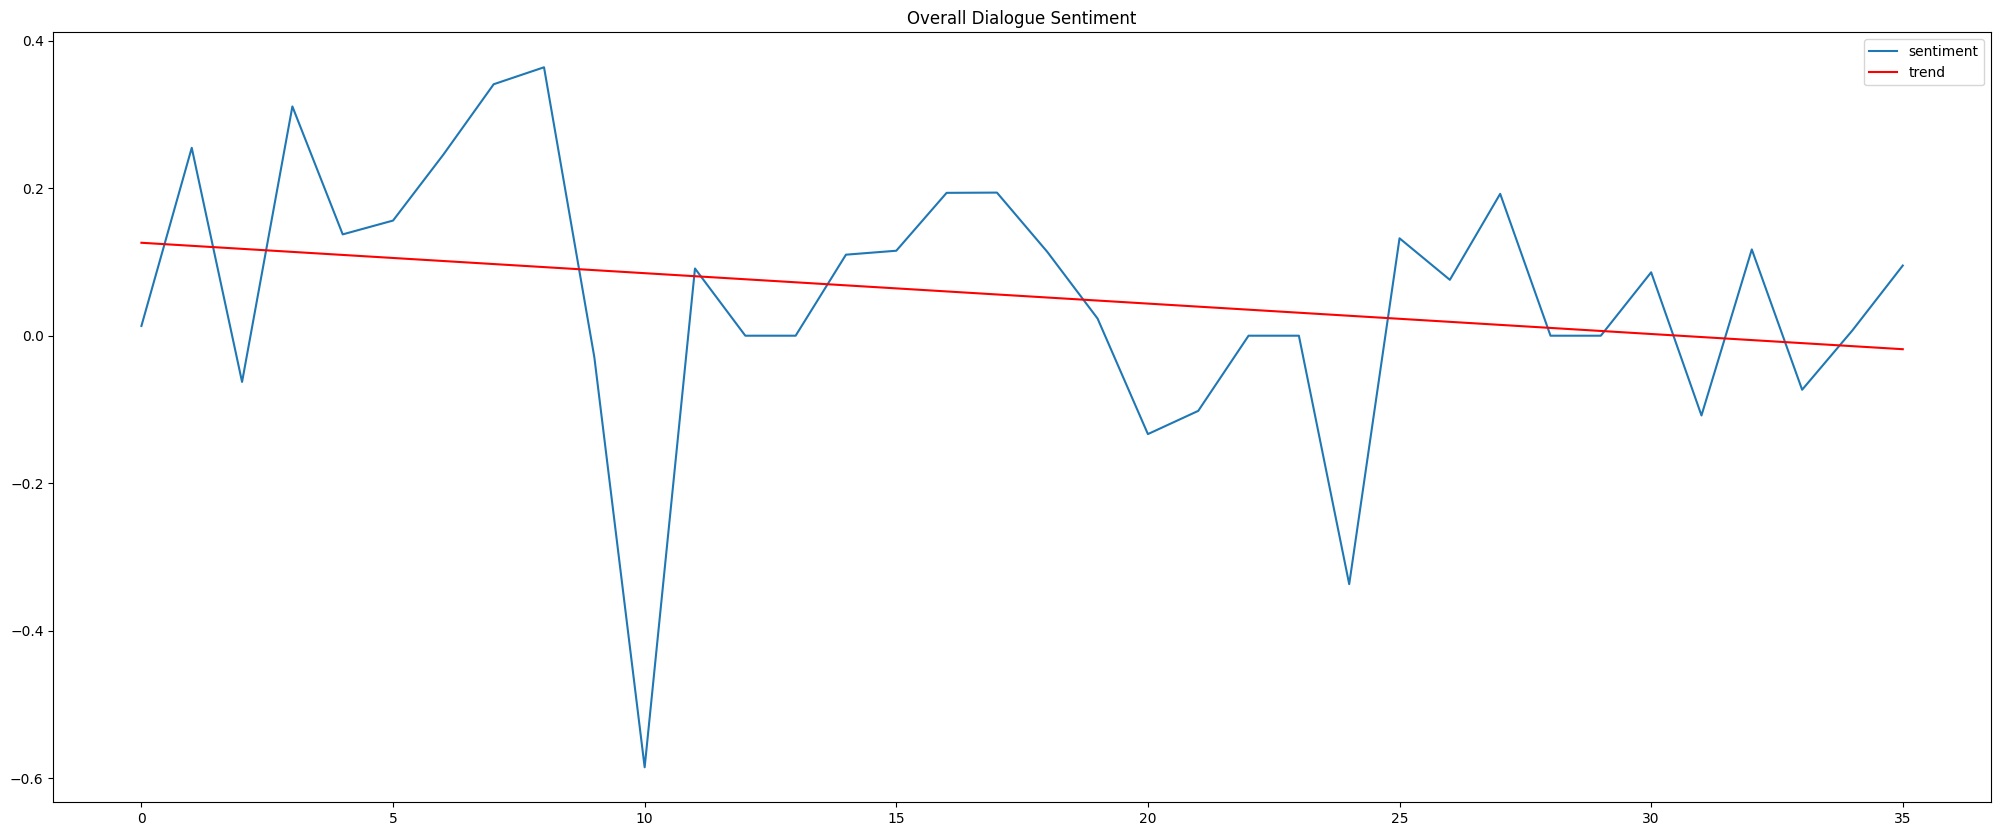

In [14]:
dialogue_sentiments = []

for dialogue in filtered_dialogues:
    sentiments = []
    for quote in dialogue.quotes:
        polarity = sentiment_predictor.polarity_scores(quote.text)['compound']
        sentiments.append(polarity)
    dialogue_sentiments.append(sum(sentiments) / len(sentiments))

x = np.arange(len(dialogue_sentiments))
slope, intercept = np.polyfit(x, dialogue_sentiments, 1)

plt.plot(x, dialogue_sentiments, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Overall Dialogue Sentiment')
plt.legend()
plt.show()